In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)

In [3]:
flights_data = pd.read_csv('flights.csv')

C:\Users\areno\AppData\Local\Temp\ipykernel_17492\3910731594.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights_data = pd.read_csv('flights.csv')


In [4]:
flights_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [5]:
flights_data = flights_data[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']]

In [6]:
flights_data.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
flights_data.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [8]:
na_values = flights_data[flights_data['ARRIVAL_DELAY'].isna() 
                         & flights_data['AIR_SYSTEM_DELAY'].isna() 
                         & flights_data['SECURITY_DELAY'].isna() 
                         & flights_data['AIRLINE_DELAY'].isna() 
                         & flights_data['LATE_AIRCRAFT_DELAY'].isna()
                         & flights_data['WEATHER_DELAY'].isna()]

In [9]:
arrival_na = flights_data[flights_data['ARRIVAL_DELAY'].isna()]
arrival_na

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,ANC,SEA,135,NaN,NaN,600,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,PHX,DFW,200,NaN,NaN,500,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,MAF,IAH,510,NaN,NaN,637,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,SGF,DFW,525,NaN,NaN,700,NaN,NaN,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,RDD,SFO,530,NaN,NaN,700,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818157,2015,12,31,4,UA,SFO,LAX,2000,NaN,NaN,2136,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
5818160,2015,12,31,4,WN,MDW,ABQ,2000,2013.0,13.0,2215,2325.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,MIA,SAN,2019,NaN,NaN,2256,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,FLL,IAG,2155,NaN,NaN,50,NaN,NaN,1,A,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>],
       [<Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>]], dtype=object)

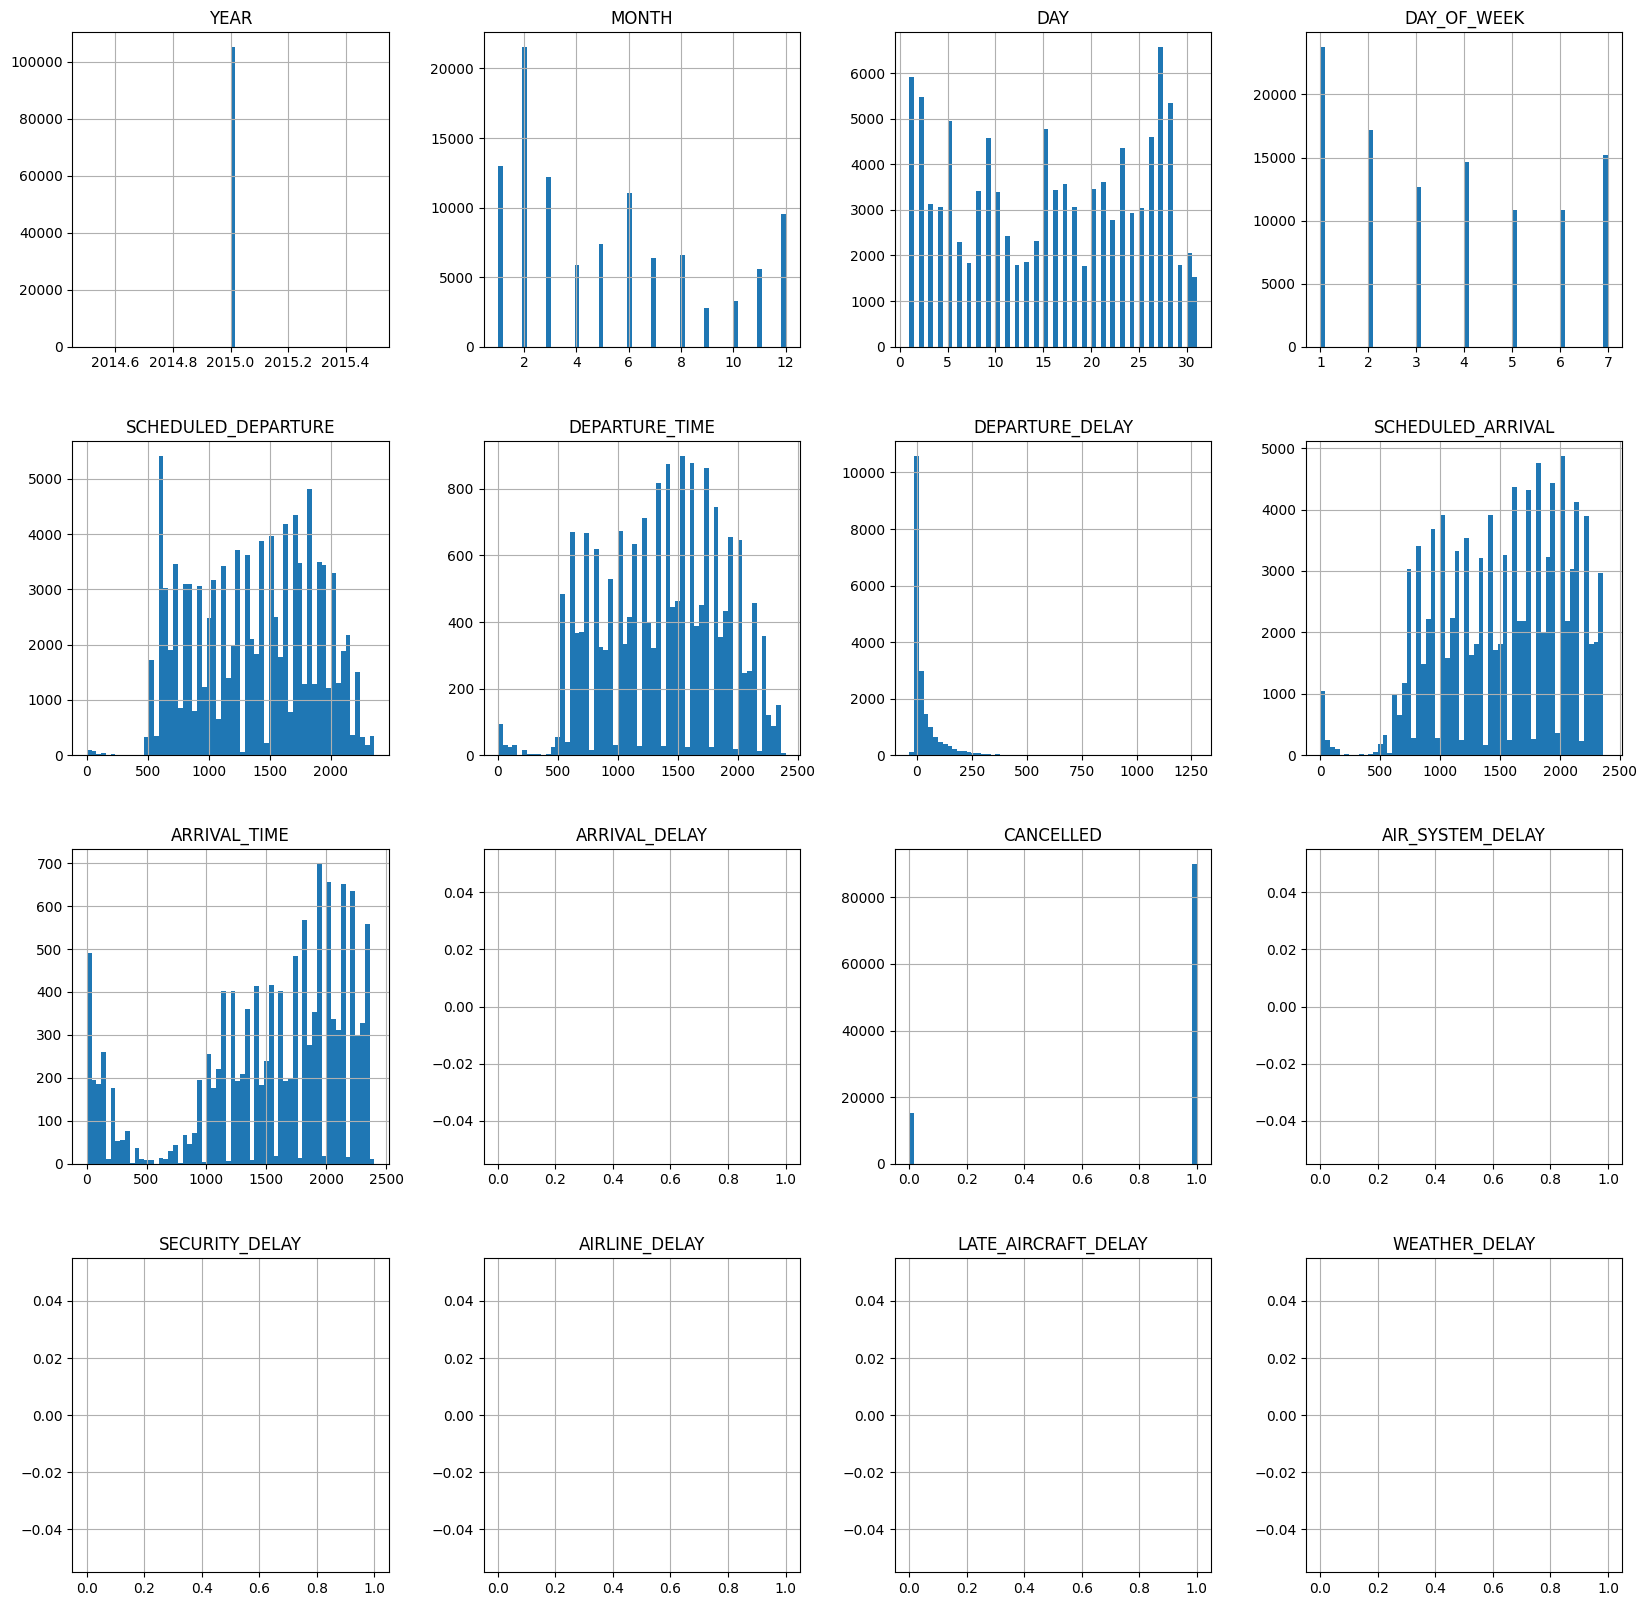

In [10]:
arrival_na.hist( bins=60 , figsize=(20,20) )

In [11]:
 
flights_data.shape
## Removing rows with missing arrival delay values

(5819079, 20)

In [12]:
flights_data.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [13]:
col = ['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']
flights_data[col] = flights_data[col].fillna(0)
flights_data

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,ANC,SEA,5,2354.0,-11.0,430,408.0,-22.0,0,NaN,0.0,0.0,0.0,0.0,0.0
1,2015,1,1,4,AA,LAX,PBI,10,2.0,-8.0,750,741.0,-9.0,0,NaN,0.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,SFO,CLT,20,18.0,-2.0,806,811.0,5.0,0,NaN,0.0,0.0,0.0,0.0,0.0
3,2015,1,1,4,AA,LAX,MIA,20,15.0,-5.0,805,756.0,-9.0,0,NaN,0.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,SEA,ANC,25,24.0,-1.0,320,259.0,-21.0,0,NaN,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,LAX,BOS,2359,2355.0,-4.0,819,753.0,-26.0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819075,2015,12,31,4,B6,JFK,PSE,2359,2355.0,-4.0,446,430.0,-16.0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819076,2015,12,31,4,B6,JFK,SJU,2359,2350.0,-9.0,440,432.0,-8.0,0,NaN,0.0,0.0,0.0,0.0,0.0
5819077,2015,12,31,4,B6,MCO,SJU,2359,2353.0,-6.0,340,330.0,-10.0,0,NaN,0.0,0.0,0.0,0.0,0.0


array([[<Axes: title={'center': 'YEAR'}>,
        <Axes: title={'center': 'MONTH'}>,
        <Axes: title={'center': 'DAY'}>,
        <Axes: title={'center': 'DAY_OF_WEEK'}>],
       [<Axes: title={'center': 'SCHEDULED_DEPARTURE'}>,
        <Axes: title={'center': 'DEPARTURE_TIME'}>,
        <Axes: title={'center': 'DEPARTURE_DELAY'}>,
        <Axes: title={'center': 'SCHEDULED_ARRIVAL'}>],
       [<Axes: title={'center': 'ARRIVAL_TIME'}>,
        <Axes: title={'center': 'ARRIVAL_DELAY'}>,
        <Axes: title={'center': 'CANCELLED'}>,
        <Axes: title={'center': 'AIR_SYSTEM_DELAY'}>],
       [<Axes: title={'center': 'SECURITY_DELAY'}>,
        <Axes: title={'center': 'AIRLINE_DELAY'}>,
        <Axes: title={'center': 'LATE_AIRCRAFT_DELAY'}>,
        <Axes: title={'center': 'WEATHER_DELAY'}>]], dtype=object)

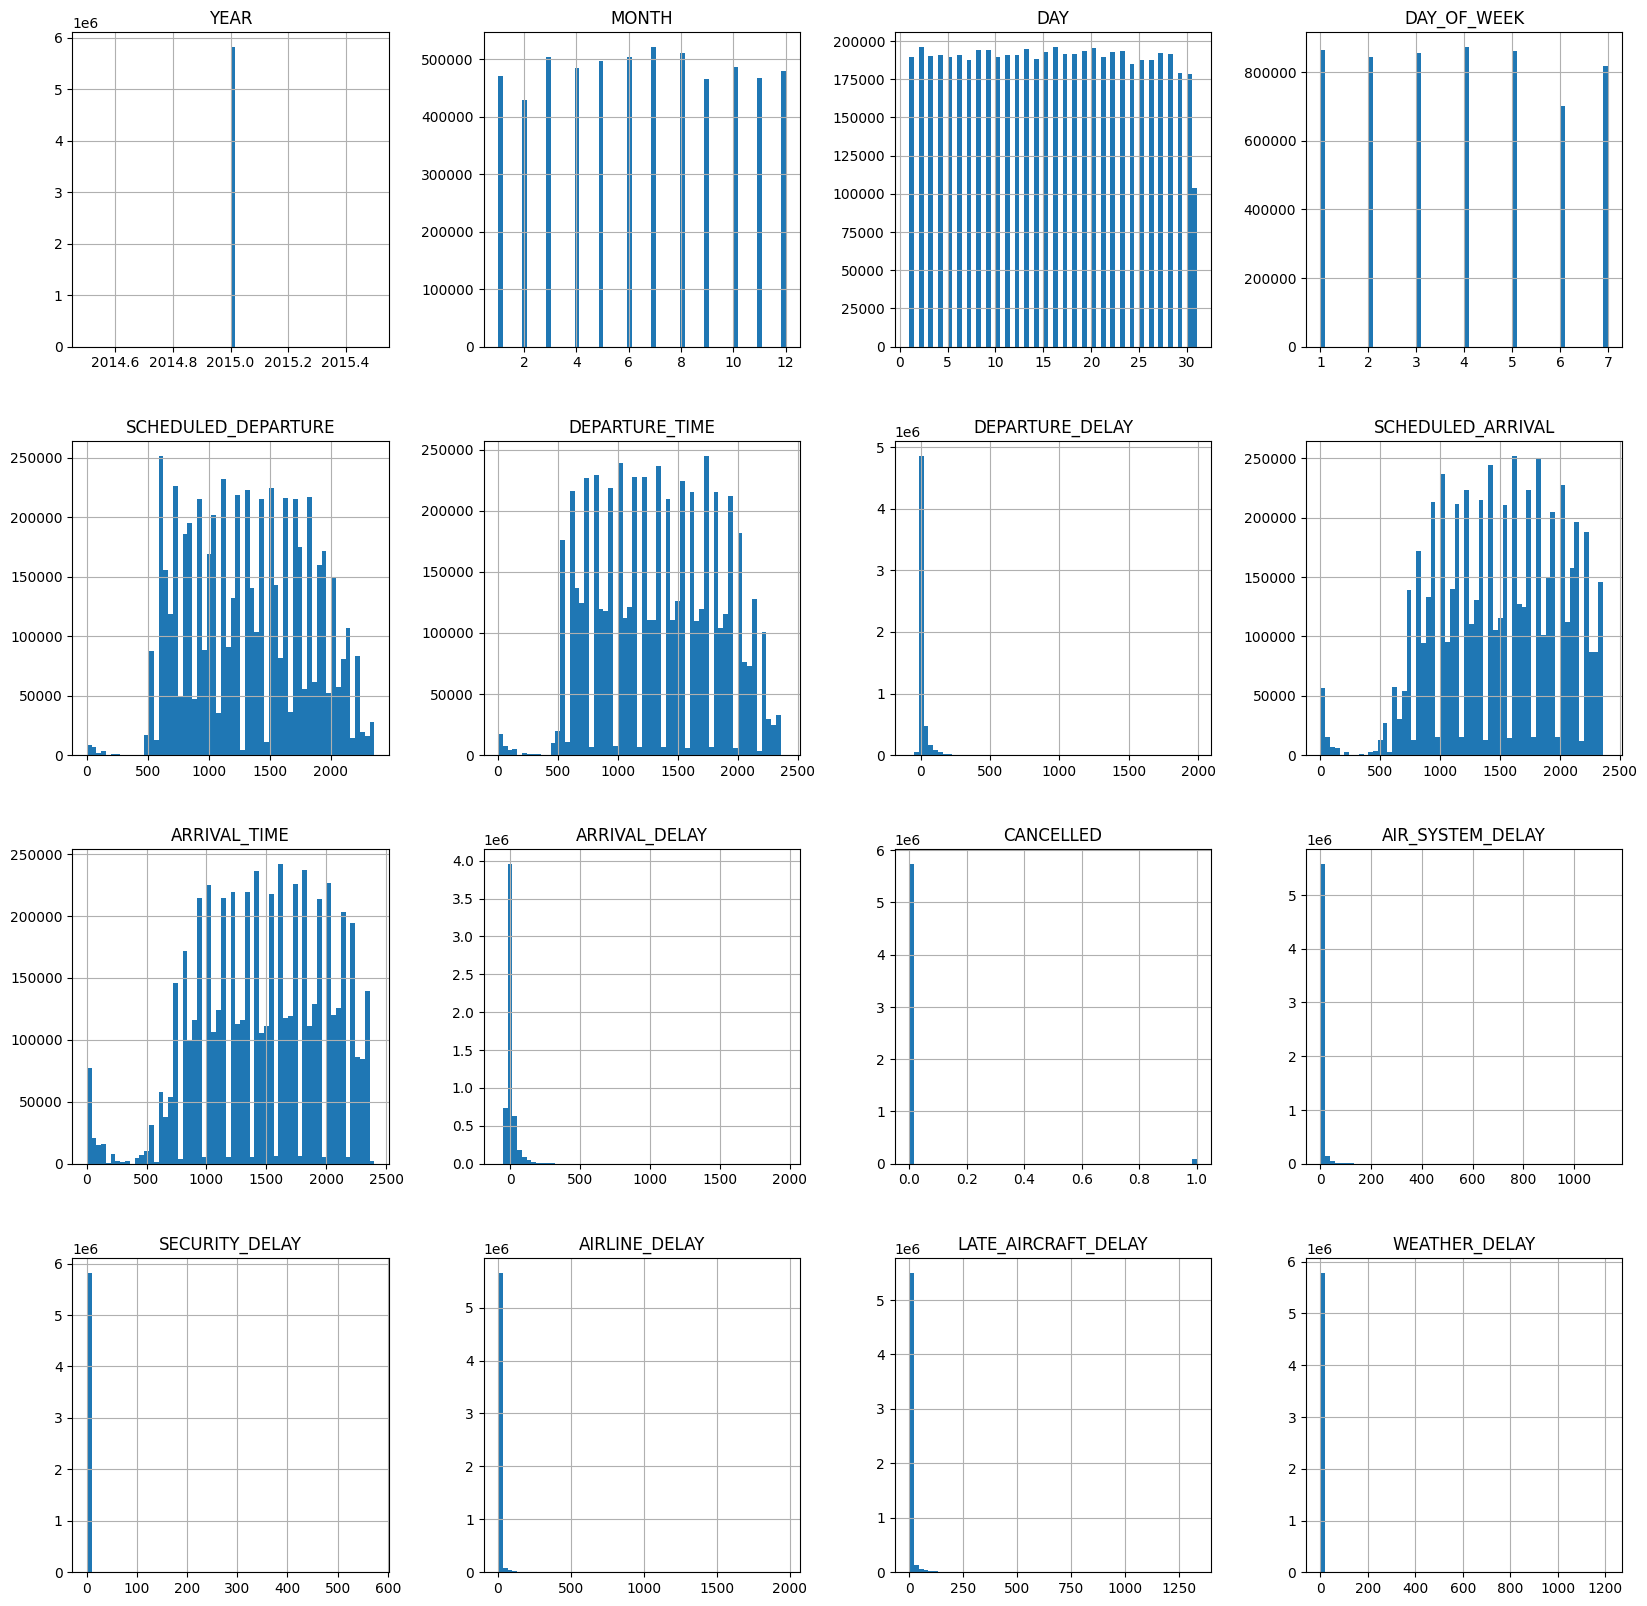

In [14]:
flights_data.hist( bins=60 , figsize=(20,20) )

In [15]:
flights_data = flights_data[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 
        'WEATHER_DELAY', 'AIR_SYSTEM_DELAY'
       , 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'SCHEDULED_DEPARTURE',
       'SCHEDULED_ARRIVAL']]

In [16]:
flights_data.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
WEATHER_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
SCHEDULED_DEPARTURE      int64
SCHEDULED_ARRIVAL        int64
dtype: object

In [17]:
flights_data['all_delay'] =flights_data[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
                                         'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum(axis=1)
flights_data

C:\Users\areno\AppData\Local\Temp\ipykernel_17492\1687081184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_data['all_delay'] =flights_data[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,WEATHER_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,all_delay
0,2015,1,1,4,AS,0.0,0.0,0.0,0.0,0.0,5,430,0.0
1,2015,1,1,4,AA,0.0,0.0,0.0,0.0,0.0,10,750,0.0
2,2015,1,1,4,US,0.0,0.0,0.0,0.0,0.0,20,806,0.0
3,2015,1,1,4,AA,0.0,0.0,0.0,0.0,0.0,20,805,0.0
4,2015,1,1,4,AS,0.0,0.0,0.0,0.0,0.0,25,320,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,0.0,0.0,0.0,0.0,0.0,2359,819,0.0
5819075,2015,12,31,4,B6,0.0,0.0,0.0,0.0,0.0,2359,446,0.0
5819076,2015,12,31,4,B6,0.0,0.0,0.0,0.0,0.0,2359,440,0.0
5819077,2015,12,31,4,B6,0.0,0.0,0.0,0.0,0.0,2359,340,0.0


In [18]:
flights_data['delay_type'] = np.where(flights_data['all_delay'] >0 ,flights_data[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
                                         'LATE_AIRCRAFT_DELAY', 
                                         'WEATHER_DELAY']].idxmax(axis=1), 'NO_DELAY')
flights_data['delay_type'].value_counts()

C:\Users\areno\AppData\Local\Temp\ipykernel_17492\568343182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  flights_data['delay_type'] = np.where(flights_data['all_delay'] >0 ,flights_data[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',


delay_type
NO_DELAY               4755640
LATE_AIRCRAFT_DELAY     410647
AIRLINE_DELAY           311386
AIR_SYSTEM_DELAY        303784
WEATHER_DELAY            35711
SECURITY_DELAY            1911
Name: count, dtype: int64

In [19]:
flights_data.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'WEATHER_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL',
       'all_delay', 'delay_type'],
      dtype='object')

In [20]:
flights_data = flights_data[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
                            'AIRLINE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL',
                            'delay_type']]

In [21]:
X_flights = flights_data[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK',
                            'AIRLINE', 'SCHEDULED_DEPARTURE', 'SCHEDULED_ARRIVAL']]
X_flights = pd.get_dummies(X_flights )
y_flights = flights_data['delay_type']  

In [22]:
X_flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,SCHEDULED_ARRIVAL,AIRLINE_AA,AIRLINE_AS,AIRLINE_B6,AIRLINE_DL,AIRLINE_EV,AIRLINE_F9,AIRLINE_HA,AIRLINE_MQ,AIRLINE_NK,AIRLINE_OO,AIRLINE_UA,AIRLINE_US,AIRLINE_VX,AIRLINE_WN
0,2015,1,1,4,5,430,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1,2015,1,1,4,10,750,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,2015,1,1,4,20,806,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,2015,1,1,4,20,805,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,2015,1,1,4,25,320,False,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,2359,819,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819075,2015,12,31,4,2359,446,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819076,2015,12,31,4,2359,440,False,False,True,False,False,False,False,False,False,False,False,False,False,False
5819077,2015,12,31,4,2359,340,False,False,True,False,False,False,False,False,False,False,False,False,False,False


In [23]:
y_flights.value_counts()

delay_type
NO_DELAY               4755640
LATE_AIRCRAFT_DELAY     410647
AIRLINE_DELAY           311386
AIR_SYSTEM_DELAY        303784
WEATHER_DELAY            35711
SECURITY_DELAY            1911
Name: count, dtype: int64

In [24]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_flights, y_flights)

In [25]:
y_resampled.value_counts()

delay_type
NO_DELAY               4755640
AIR_SYSTEM_DELAY       4755640
AIRLINE_DELAY          4755640
WEATHER_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
SECURITY_DELAY         4755640
Name: count, dtype: int64

In [26]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_resampled, y_resampled)

In [27]:
clf.score(X_resampled, y_resampled)

0.9919470705660367

In [28]:
print(clf.predict(X_flights.iloc[445:460]) == y_flights.iloc[445:460])

445    True
446    True
447    True
448    True
449    True
450    True
451    True
452    True
453    True
454    True
455    True
456    True
457    True
458    True
459    True
Name: delay_type, dtype: bool


In [29]:
X_flights.iloc[1]

YEAR                    2015
MONTH                      1
DAY                        1
DAY_OF_WEEK                4
SCHEDULED_DEPARTURE       10
SCHEDULED_ARRIVAL        750
AIRLINE_AA              True
AIRLINE_AS             False
AIRLINE_B6             False
AIRLINE_DL             False
AIRLINE_EV             False
AIRLINE_F9             False
AIRLINE_HA             False
AIRLINE_MQ             False
AIRLINE_NK             False
AIRLINE_OO             False
AIRLINE_UA             False
AIRLINE_US             False
AIRLINE_VX             False
AIRLINE_WN             False
Name: 1, dtype: object

In [30]:
test = pd.DataFrame({
    'YEAR': [2015],
    'MONTH': [8],
    'DAY': [4],
    'DAY_OF_WEEK': [3],
    'AIRLINE_AA': [0],
    'AIRLINE_AS': [0],
    'AIRLINE_B6': [0],
    'AIRLINE_DL': [0],
    'AIRLINE_F9': [0],
    'AIRLINE_HA': [0],
    'AIRLINE_NK': [0],
    'AIRLINE_OO': [0],
    'AIRLINE_UA': [1],
    'AIRLINE_VX': [0],
    'AIRLINE_WN': [0],
    'SCHEDULED_DEPARTURE': [513],
    'SCHEDULED_ARRIVAL': [720]
})
type(X_resampled)

pandas.core.frame.DataFrame

In [31]:
test_df = pd.DataFrame([{
    'YEAR': 2015,
    'MONTH': 8,
    'DAY': 4,
    'DAY_OF_WEEK': 3,
    'AIRLINE_AA': 0,
    'AIRLINE_AS': 0,
    'AIRLINE_B6': 0,
    'AIRLINE_DL': 1,
    'AIRLINE_F9': 0,
    'AIRLINE_HA': 0,
    'AIRLINE_NK': 0,
    'AIRLINE_OO': 0,
    'AIRLINE_UA': 0,
    'AIRLINE_VX': 0,
    'AIRLINE_WN': 0,
    'SCHEDULED_DEPARTURE': 513,
    'SCHEDULED_ARRIVAL': 720
}])

# train'deki kolonlara hizala (eksikleri 0 ile doldur, fazlaları at)
test_df = test_df.reindex(columns=X_resampled.columns, fill_value=0)

clf.predict(test_df)

array(['NO_DELAY'], dtype=object)